In [1]:
#importing Required Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#opening csv files
data = pd.read_csv("titanic.csv")

In [3]:
#many fields are blank in "Cabin","Age"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


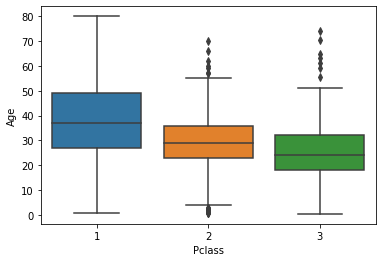

In [4]:
#plotting boxplot to find relationship btwn age and pclass
sns.boxplot(x="Pclass",y = "Age",data = data)

In [5]:
#function to fill age column
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37              #average values when pclass is 1 observed from boxplot
        elif Pclass == 2:
            return 29              #average values when pclass is 2 observed from boxplot
        else:
            return 24              #average values when pclass is 3 observed from boxplot
    else:
        return Age                 #if already age column is filled then leave it as it is  

In [6]:
#applying our function to Age column
data["Age"]= data[["Age","Pclass"]].apply(impute_age,axis=1)

In [7]:
#get_dummies = changes categorical variables into dummies 
sex= pd.get_dummies(data["Sex"],drop_first=True) # drop_first = dropping first row coz one column is oppposite to other 
sex

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [8]:
#dropping c column coz we know that it will have values contradictory other columns ..
embark = pd.get_dummies(data["Embarked"],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [9]:
#concatenating new columns with dataframe
data = pd.concat([sex,embark,data],axis = 1)

In [10]:
#dropping text data columns
data.drop(["Sex","Embarked","Name","Ticket","PassengerId","Cabin"],axis = 1, inplace= True)

In [11]:
data.columns

Index(['male', 'Q', 'S', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [12]:
#assinging labels
x = data[['male', 'Q', 'S', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']]
y = data["Survived"]


In [13]:
#spliiting the data(70-30)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [14]:
#creating a instance
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)


C:\Users\Sivant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#predicting y_test
predictions = logmodel.predict(x_test)

In [16]:
print(classification_report(y_test,predictions))
#report to see the errors/effeciency

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       100

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [17]:
confusion_matrix(y_test,predictions)
#to see the effeciency of model

array([[168,   0],
       [  0, 100]], dtype=int64)